# Analysis of FTSE 100 and S&P 500 Returns

### Investigating the Correlation Between FTSE 100 and S&P 500 Returns with Macroeconomic Factors

### Import Packages

In [ ]:
# Import necessary libraries for data manipulation, statistical analysis, and plotting
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import yfinance as yf

### Set a uniform color palette

In [ ]:
# Define a dictionary of colors for consistent plotting
colors = {
    "ftse": "#1f77b4",  # Blue
    "ftse_ma": "#aec7e8",  # Light Blue
    "gspc": "#2ca02c",  # Green
    "gspc_ma": "#98df8a",  # Light Green
    "hist1": "#1f77b4",  # Blue
    "hist2": "#2ca02c",  # Green
    "scatter": "#ff7f0e"  # Orange
}

## Data Preparation

### Import data

In [ ]:
# Download historical closing price data for FTSE 100 (^FTSE) and S&P 500 (^GSPC)
Data1 = yf.download(["^FTSE", "^GSPC"], start="2015-01-01", end="2024-12-31", interval="1d")['Close']

/tmp/ipython-input-3070178739.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  Data1 = yf.download(["^FTSE", "^GSPC"], start="2015-01-01", end="2024-12-31", interval="1d")['Close']
[*********************100%***********************]  2 of 2 completed


### Drop NaN values

In [ ]:
# Remove rows with missing values from the imported data
Data1 = Data1.dropna()

### Calculate stock returns

In [ ]:
# Calculate daily logarithmic returns for both indices
rets = np.log(Data1 / Data1.shift(1))

### Create lag

In [ ]:
# Create a lagged column for the S&P 500 returns (lagged by one day)
rets['lus'] = rets["^GSPC"].shift(1)

### Drop NaN values after creating lag

In [ ]:
# Remove rows with missing values that resulted from creating the lagged variable
rets = rets.dropna()

### Extract year and create dummy variables

In [ ]:
# Convert the index to datetime objects
rets.index = pd.to_datetime(rets.index)

# Extract the year from the index and store it in a new column 'year'
rets['year'] = rets.index.year

# Create a dummy variable 'covid' which is 1 for the year 2020 and 0 otherwise
rets['covid'] = np.where((rets.year == 2020), 1, 0)

# Create a dummy variable 'ruwar' which is 1 from the start of the Russia-Ukraine war (2022-02-24) onwards, and 0 before
rets['ruwar'] = (rets.index >= '2022-02-24').astype(int)

## Visualization

### Time Series: Daily index returns with rolling averages (30 day)

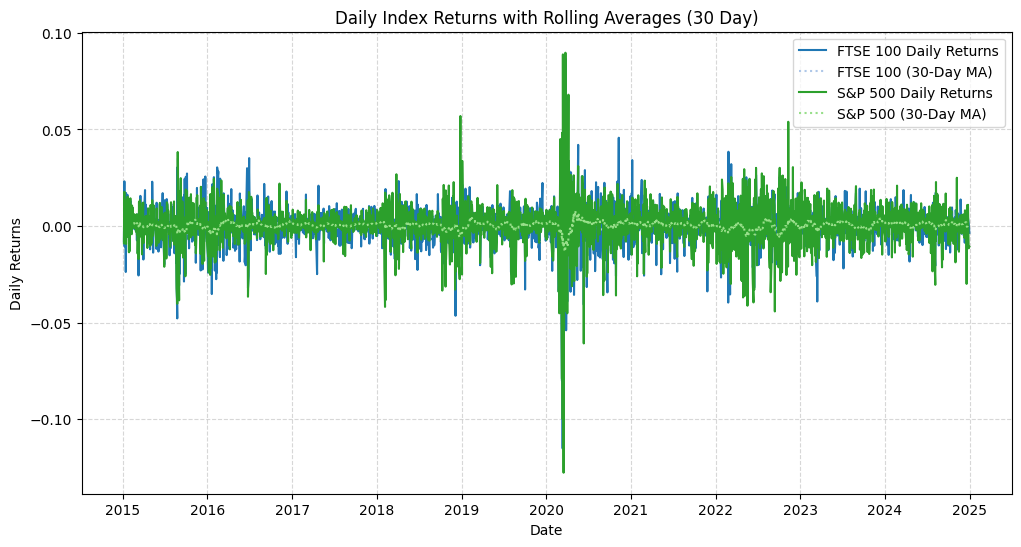

In [ ]:
# Plot the daily returns of FTSE 100 and S&P 500 along with their 30-day rolling averages
plt.figure(figsize=(12, 6))
plt.plot(rets.index, rets['^FTSE'], label='FTSE 100 Daily Returns', color=colors["ftse"])
plt.plot(rets.index, rets['^FTSE'].rolling(30).mean(), label='FTSE 100 (30-Day MA)', linestyle='dotted', color=colors["ftse_ma"])
plt.plot(rets.index, rets['^GSPC'], label='S&P 500 Daily Returns', color=colors["gspc"])
plt.plot(rets.index, rets['^GSPC'].rolling(30).mean(), label='S&P 500 (30-Day MA)', linestyle='dotted', color=colors["gspc_ma"])
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Index Returns with Rolling Averages (30 Day)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Time Series: Data Adjusted Closing Averages Prices with Rolling Averages (30 Day)

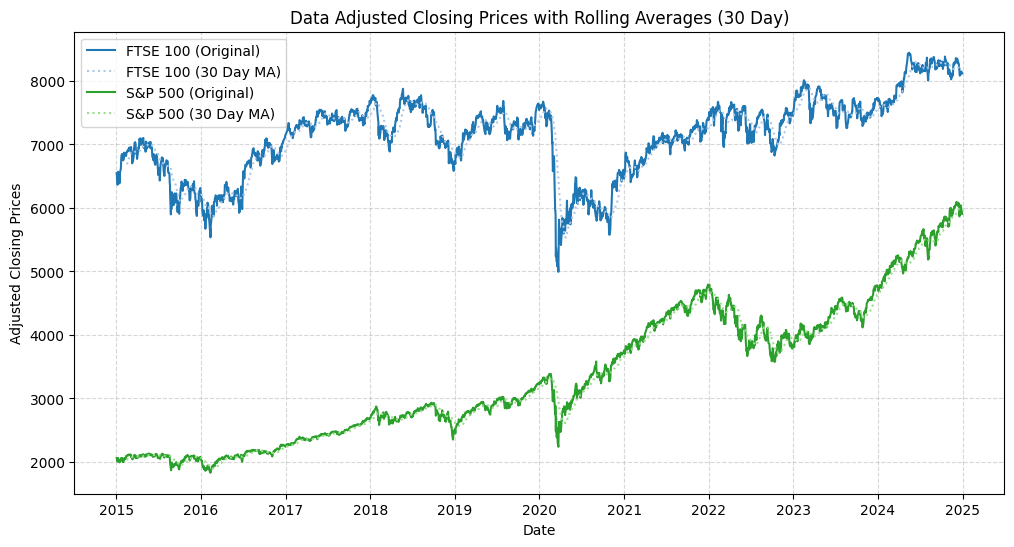

In [ ]:
# Plot the adjusted closing prices of FTSE 100 and S&P 500 along with their 30-day rolling averages
plt.figure(figsize=(12, 6))
plt.plot(Data1.index, Data1['^FTSE'], label='FTSE 100 (Original)', color=colors["ftse"])
plt.plot(Data1.index, Data1['^FTSE'].rolling(30).mean(), label='FTSE 100 (30 Day MA)', linestyle='dotted', color=colors["ftse_ma"])
plt.plot(Data1.index, Data1['^GSPC'], label='S&P 500 (Original)', color=colors["gspc"])
plt.plot(Data1.index, Data1['^GSPC'].rolling(30).mean(), label='S&P 500 (30 Day MA)', linestyle='dotted', color=colors["gspc_ma"])
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Prices')
plt.title('Data Adjusted Closing Prices with Rolling Averages (30 Day)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Histogram of Returns

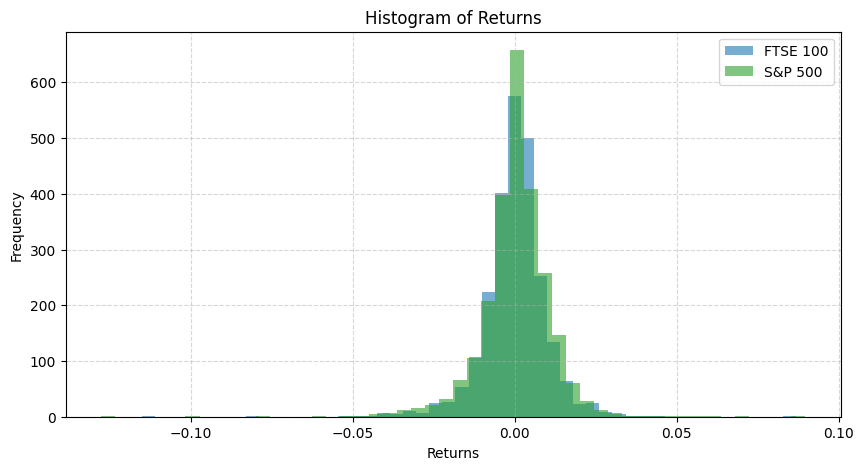

In [ ]:
# Plot histograms of the daily returns for FTSE 100 and S&P 500
plt.figure(figsize=(10, 5))
plt.hist(rets['^FTSE'], bins=50, alpha=0.6, label='FTSE 100', color=colors["hist1"])
plt.hist(rets['^GSPC'], bins=50, alpha=0.6, label='S&P 500', color=colors["hist2"])
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Returns')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Scatter Plot of S&P 500 Lagged Returns and FTSE 100

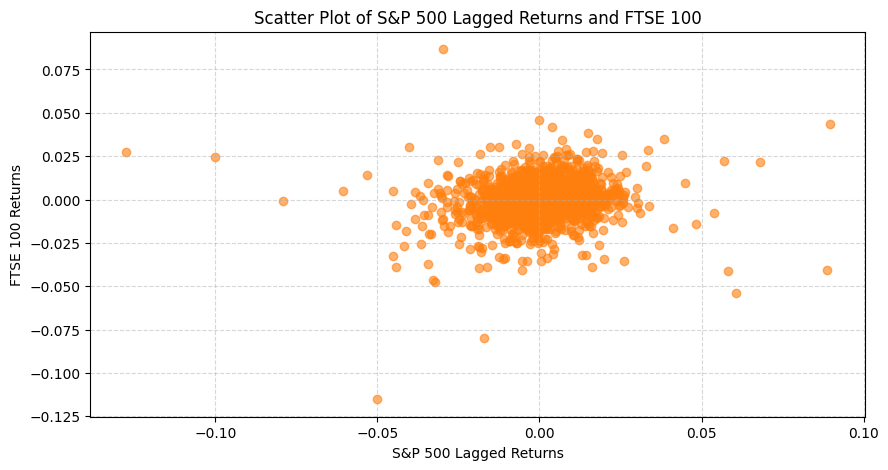

In [ ]:
# Create a scatter plot to visualize the relationship between lagged S&P 500 returns and current FTSE 100 returns
plt.figure(figsize=(10, 5))
plt.scatter(rets['lus'], rets['^FTSE'], color=colors["scatter"], alpha=0.6)
plt.xlabel('S&P 500 Lagged Returns')
plt.ylabel('FTSE 100 Returns')
plt.title('Scatter Plot of S&P 500 Lagged Returns and FTSE 100')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Time Series of S&P 500 Lagged Returns and FTSE 100 (Separate charts)

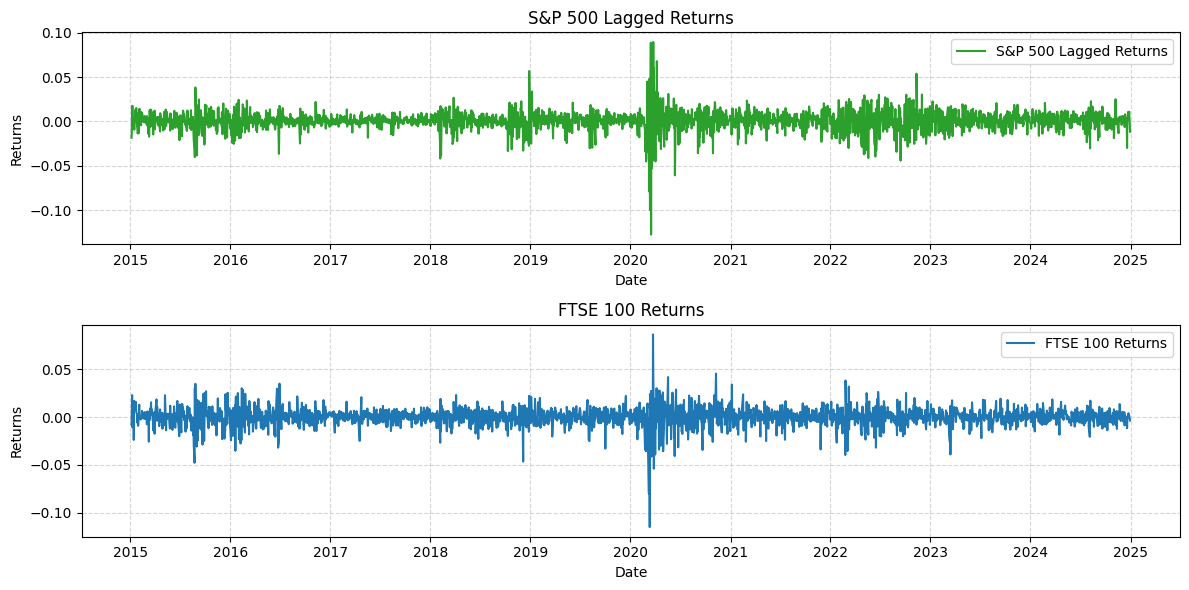

In [ ]:
# Plot the time series of lagged S&P 500 returns and current FTSE 100 returns in separate subplots
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(rets.index, rets['lus'], label='S&P 500 Lagged Returns', color=colors["gspc"])
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('S&P 500 Lagged Returns')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(2, 1, 2)
plt.plot(rets.index, rets['^FTSE'], label='FTSE 100 Returns', color=colors["ftse"])
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('FTSE 100 Returns')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Analysis

### Table 1: Quartile Analysis of FTSE 100 and SNP 500 Market Returns

In [ ]:
# Select relevant columns for quartile analysis
quartile_data = rets[['^FTSE', '^GSPC', 'covid', 'ruwar']]

# Generate descriptive statistics, including quartiles
quartile_stats = quartile_data.describe()

# Print the quartile analysis table
print('\nQuartile Analysis of FTSE 100 and SNP 500 Market Returns')
print(quartile_stats)


Quartile Analysis of FTSE 100 and SNP 500 Market Returns
Ticker        ^FTSE        ^GSPC        covid        ruwar
count   2466.000000  2466.000000  2466.000000  2466.000000
mean       0.000095     0.000435     0.100568     0.283861
std        0.010026     0.011366     0.300816     0.450961
min       -0.115117    -0.127652     0.000000     0.000000
25%       -0.004422    -0.003808     0.000000     0.000000
50%        0.000598     0.000690     0.000000     0.000000
75%        0.005036     0.005794     0.000000     1.000000
max        0.086664     0.089683     1.000000     1.000000


### Table: Annual Arithmetic and Geometric Mean Returns

In [ ]:
# Group data by year and calculate the mean and standard deviation of returns
annual_returns = rets.groupby('year')[['^FTSE', '^GSPC']].agg(['mean', 'std'])

# Rename columns for clarity
annual_returns.columns = ['FTSE 100 Arithmetic Mean', 'S&P 500 Arithmetic Mean',
                          'FTSE 100 Std', 'S&P 500 Std']

# Calculate geometric mean for each year
annual_geometric_returns = rets.groupby('year')[['^FTSE', '^GSPC']].apply(lambda x: (1 + x).prod()**(1/len(x)) - 1)

# Rename geometric mean columns
annual_geometric_returns.columns = ['FTSE 100 Geometric Mean', 'S&P 500 Geometric Mean']

# Concatenate arithmetic and geometric mean tables
annual_returns = pd.concat([annual_returns, annual_geometric_returns], axis=1)

# Print the annual returns table
print('\nAnnual Arithmetic and Geometric Mean Returns')
print(annual_returns)


Annual Arithmetic and Geometric Mean Returns
      FTSE 100 Arithmetic Mean  S&P 500 Arithmetic Mean  FTSE 100 Std  \
year                                                                    
2015                 -0.000112                 0.011010      0.000047   
2016                  0.000543                 0.010718      0.000367   
2017                  0.000298                 0.005474      0.000719   
2018                 -0.000540                 0.008310     -0.000261   
2019                  0.000461                 0.007477      0.001023   
2020                 -0.000624                 0.018749      0.000607   
2021                  0.000541                 0.008019      0.000964   
2022                  0.000037                 0.010429     -0.000890   
2023                  0.000151                 0.007404      0.000886   
2024                  0.000198                 0.005993      0.000866   

      S&P 500 Std  FTSE 100 Geometric Mean  S&P 500 Geometric Mean  
year    

### Regression Analysis

#### Estimate model 1 for single regression

In [ ]:
# Drop the original S&P 500 column as we are using the lagged version
rets = rets.drop(columns=['^GSPC'])

# Define the dependent variable (FTSE 100 returns)
Y = rets.iloc[:, 0]

# Define the independent variable (lagged S&P 500 returns)
X = rets.iloc[:, 1]

# Add a constant to the independent variable for the regression model
X = sm.add_constant(X)

# Create and fit the OLS regression model
model = sm.OLS(Y, X)
result = model.fit()

# Print the regression summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  ^FTSE   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     48.23
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           4.84e-12
Time:                        08:12:59   Log-Likelihood:                 7875.1
No. Observations:                2466   AIC:                        -1.575e+04
Df Residuals:                    2464   BIC:                        -1.573e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.272e-05      0.000      0.213      0.8

#### Estimate model 2 (Dummy variable)

In [ ]:
# Drop the 'year' column as it's no longer needed for this model
rets = rets.drop(columns=['year'])

# Define the dependent variable (FTSE 100 returns)
Y = rets.iloc[:, 0]

# Define the independent variables (lagged S&P 500 returns, covid, and ruwar dummy variables)
X = rets.iloc[:, 1:]

# Add a constant to the independent variables for the regression model
X = sm.add_constant(X)

# Create and fit the second OLS regression model with dummy variables
model2 = sm.OLS(Y, X)
result2 = model2.fit()

# Print the regression summary
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  ^FTSE   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     16.60
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           1.12e-10
Time:                        08:12:59   Log-Likelihood:                 7875.9
No. Observations:                2466   AIC:                        -1.574e+04
Df Residuals:                    2462   BIC:                        -1.572e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.615      0.5